# 图像平滑


In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

## 2D卷积
$$ K = \frac{1}{25} \begin{bmatrix} 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \end{bmatrix}$$

把这个kernel放到一个像素上，求这个kernel下25个像素的和，求平均，赋值给中心像素，然后移动到下一个像素。

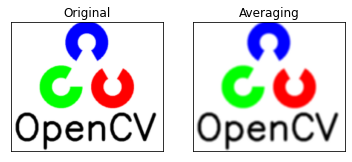

In [4]:
img = cv.imread('./images/logo2.png')
kernel = np.ones((5,5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel) # when ddepth=-1, the output image will have the same depth as the source.

plt.subplot(121), plt.imshow(img), plt.title('Original') # 1rows 2cols  #the 1st grid 
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 图像模糊
通过低通滤波器内核卷积来实现模糊， 实际上消除了高频内容（noise，edges）

opencv主要提供了以下四种模糊方法

1. 平均
    
    这是通过将图像与归一化框滤镜进行卷积来完成的。它仅获取内核区域下所有像素的平均值，并替换中心元素。这是通过功能**cv.blur()**或**cv.boxFilter()**完成的。

    我们应该指定内核的宽度和高度

    注意 如果您不想使用标准化的框式过滤器，请使用**cv.boxFilter()**。将参数`normalize = False`传递给函数。

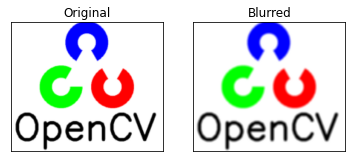

In [7]:
blur = cv.blur(img, (5,5))

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2. 高斯模糊
    
    高斯核 

    高斯核的函数图像是一个正态分布钟形线，坐标越趋近中心点，值就越大，反之越小。也就是说离中心点越近权值就越大，离中心点越远，权值就越小。

    高斯核函数公式中的xy是滤波器的点坐标，计算出来的值是滤波器上的值，也就是图像上每个点对应的权重，用滤波器与原图像滚动相乘，也就得到了最终的处理结果。

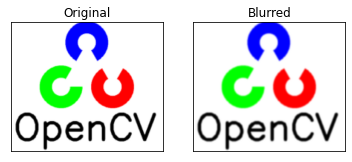

In [8]:
blur = cv.GaussianBlur(img, (5,5), 0)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

3. 中位模糊
    核下元素中值，将中心元素替换为中值，对于消除椒盐噪声非常有效，核大小需要是正奇数

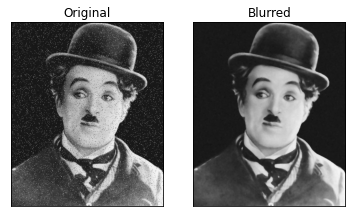

In [10]:
noisy = cv.imread('./images/noisy.png')
median = cv.medianBlur(noisy, 5)

plt.subplot(121), plt.imshow(noisy), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

3. 双边滤波

    **cv.bilateralFilter()** 在去除噪声的同时保持边缘清晰锐利非常有效。但是，与其他过滤器相比，该操作速度较慢。我们已经看到，高斯滤波器采用像素周围的邻域并找到其高斯加权平均值。高斯滤波器仅是空间的函数，也就是说，滤波时会考虑附近的像素。它不考虑像素是否具有几乎相同的强度。它不考虑像素是否是边缘像素。因此它也模糊了边缘，这是我们不想做的。

    双边滤波器在空间中也采用高斯滤波器，但是又有一个高斯滤波器，它是像素差的函数。空间的高斯函数确保仅考虑附近像素的模糊，而强度差的高斯函数确保仅考虑强度与中心像素相似的那些像素的模糊。由于边缘的像素强度变化较大，因此可以保留边缘

    用双边滤波磨个皮

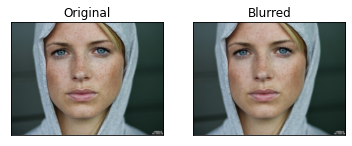

In [13]:
bi = cv.imread('./images/bilateral.jpg')
blur = cv.bilateralFilter(bi,9,75,75)

bi = bi[:,:,::-1]
blur = blur[:,:,::-1]

plt.subplot(121), plt.imshow(bi), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

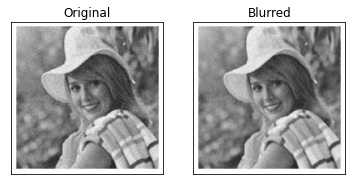

In [17]:
bi2 = cv.imread('./images/bi.png')
blur = cv.bilateralFilter(bi2,9,75,75)

bi2 = bi2[:,:,::-1]
blur = blur[:,:,::-1]

plt.subplot(121), plt.imshow(bi2), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()